### Redes Neuronales de Convolución - CNN

In [1]:
%load_ext watermark
%watermark

2018-03-10T18:04:49+01:00

CPython 3.6.4
IPython 6.2.1

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
CPU cores  : 8
interpreter: 64bit


In [8]:
from IPython.display import Image


import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7, 7)

### Convoluciones

La convolución es una operación entre matrices donde una matriz pequeña (*kernel o filtro*) se aplica de forma iterativa a los distintos trozos de una matriz más grande (una imagen).

En primer lugar vamos a ver de forma práctica el ejemplo de convolución visto en la teoría. Para ello creamos una imagen con dos troz verticales, uno blanco y otro negro.

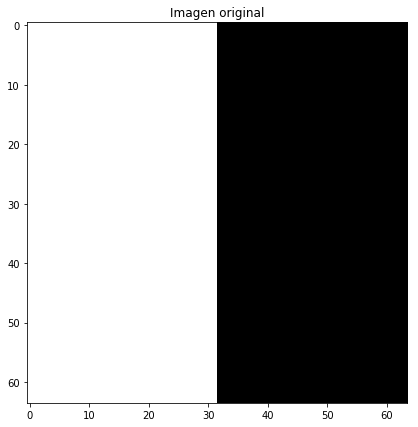

In [9]:
img_size = 64 # 64x64 pixeles
img_borde_vertical = np.zeros((img_size,img_size))

img_borde_vertical[:, :int(img_size/2)] = 1

plt.imshow(img_borde_vertical, cmap="gray")
plt.title("Imagen original");

Ahora vamos a aplicarle un filtro de detección de bordes verticales (filtro Sobel vertical) y ver el output. Para ello usaremos la función de scipy `convolve2d` que realiza la convolución.

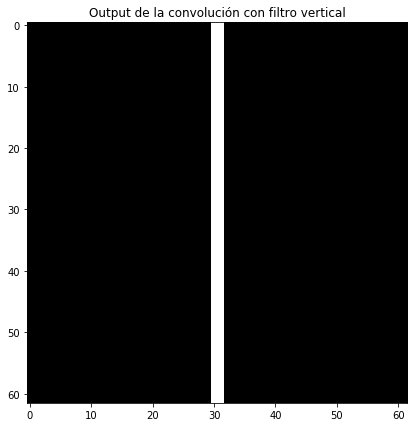

In [13]:
from scipy import signal

filtro_sobel_vertical = np.array([[1, 0, -1],
                                  [1, 0, -1],
                                  [1, 0,-1]])

output_convolucion = signal.convolve2d(img_borde_vertical, filtro_sobel_vertical, mode="valid")
plt.imshow(np.absolute(output_convolucion), cmap='gray')
plt.title("Output de la convolución con filtro vertical");

Vemos que efectivamente, ha detectado el borde de separación entre la zona blanca y la negra

Ahora vamos a cargar una imagen de prueba que tiene `scipy`

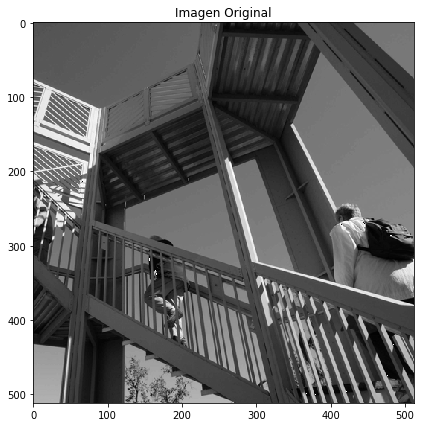

In [14]:
from scipy import misc
img_original = misc.ascent()

plt.imshow(img_original, cmap='gray')
plt.title("Imagen Original");

Vamos a aplicar el mismo filtro de detección de bordes verticales a la foto:

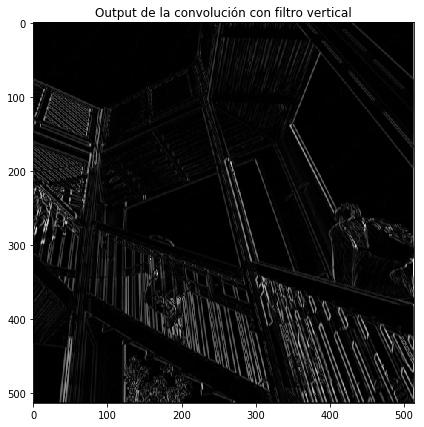

In [15]:
from scipy import signal


output_convolucion = signal.convolve2d(img_original, filtro_sobel_vertical)
plt.imshow(np.absolute(output_convolucion), cmap='gray')
plt.title("Output de la convolución con filtro vertical");

Podemos usar la misma técnica y cambiar el kernel para detectar bordes horizontales

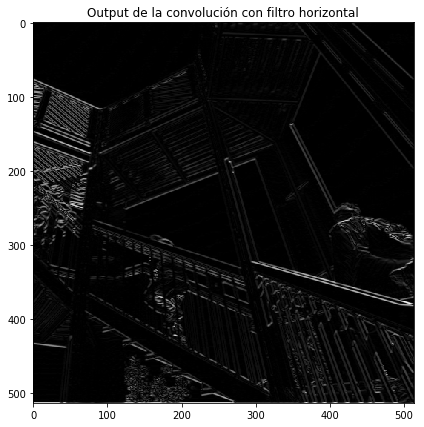

In [16]:
filtro_sobel_horizontal = np.array([[-1,-1,-1],
                                    [0, 0, 0],
                                    [1, 1,1]])

output_convolucion = signal.convolve2d(img_original, filtro_sobel_horizontal)
plt.imshow(np.absolute(output_convolucion), cmap='gray')
plt.title("Output de la convolución con filtro horizontal");

### Redes Neuronales de Convolución - CNN

### Cargamos los datos

En este caso vamos a usar un dataset nuevo, el [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist), que es un dataset más moderno que el dataset de dígitos MNIST, que hoy en día se considera un dataset demasiado "facil", y que puede ser resuelto con modelos que no están relacionados con la vision artificial (como los SVMs).

En concreto el dataset Fashion MNIST consiste en 60,000 fotos (28x28 pixeles como el dataset de dígitos) de prendas de ropa y su objetivo es clasificar las imágenes respecto al tipo de ropa mostrado (10 tipos distintos de artículos)

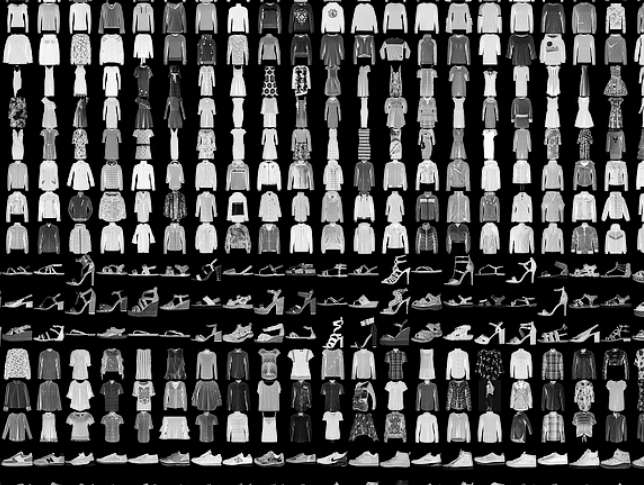

In [17]:
Image("../../media/fashion_mnist.png")

In [18]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Hay 10 clases objetivo

In [21]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

podemos usar `np.bincount` para contar cuantas observaciones hay de cada clase de prenda

In [22]:
np.bincount(y_train)

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64)

Vemos que las clases están balanceadas

Convertimos la variable objetivo a vectores one hot

In [23]:
from keras.utils.np_utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [24]:
y_train_one_hot[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [25]:
plt.rcParams["figure.figsize"] = (4, 4)

In [26]:
from ipywidgets import interact, IntSlider

@interact(i=IntSlider(min=0,max=100,step=1,value=1))
def dibujar_imagen(i):
    plt.imshow(x_train[i], cmap="gray")
    plt.title("Clase de prenda: {}".format(y_train[i]))

interactive(children=(IntSlider(value=1, description='i'), Output()), _dom_classes=('widget-interact',))

En primer lugar, vamos a usar una red Densa y la vamos a evaluar

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Aplanamos las imágenes

In [28]:
x_train_plano = x_train.reshape(x_train.shape[0],28*28)
x_test_plano = x_test.reshape(x_test.shape[0],28*28)

In [29]:
x_train_plano[0].shape

(784,)

In [30]:
modelo_denso = Sequential()
modelo_denso.add(Dense(128, activation="relu", input_shape=(784,)))
modelo_denso.add(Dropout(0.2))
modelo_denso.add(Dense(256, activation="relu"))
modelo_denso.add(Dropout(0.2))
modelo_denso.add(Dense(128, activation="relu"))
modelo_denso.add(Dropout(0.2))
modelo_denso.add(Dense(np.unique(y_train).shape[0], activation="softmax"))

modelo_denso.compile(optimizer="adam", loss="categorical_crossentropy", 
               metrics=["accuracy"])

modelo_denso.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

In [31]:
modelo_denso.fit(x_train_plano, y_train_one_hot, epochs=50, batch_size=1000, verbose=0);

In [32]:
modelo_denso.evaluate(x_test_plano, y_test_one_hot)

10000/10000 [==============================] - 1s 64us/step


[0.415475745677948, 0.8554]

Ahora vamos a usar una red de convolución (CNN)

In [33]:
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [36]:
x_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [34]:
x_train.shape

(60000, 28, 28, 1)

In [37]:
from keras.layers import Conv2D, Flatten, MaxPooling2D

batch_size = 256
num_classes = 10
epochs = 50

input_shape = (28, 28, 1)

modelo_cnn = Sequential()
modelo_cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
modelo_cnn.add(MaxPooling2D(pool_size=(2, 2)))
modelo_cnn.add(Dropout(0.25))
modelo_cnn.add(Flatten())
modelo_cnn.add(Dense(32, activation='relu'))
modelo_cnn.add(Dropout(0.5))
modelo_cnn.add(Dense(num_classes, activation='softmax'))
modelo_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                173088    
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total para

In [38]:
modelo_cnn.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])


modelo_cnn.fit(x_train, y_train_one_hot, epochs=50, batch_size=1000, verbose=0);

In [39]:
modelo_cnn.evaluate(x_test, y_test_one_hot, verbose=0)

[0.306253556060791, 0.894]

Generalmente se concatenan múltiples capas convolucionales en una red de convolución CNN

In [40]:
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping

batch_size = 128
num_classes = 10
epochs = 100
filter_pixel=3
noise = 1
droprate=0.25

model = Sequential()
model.add(Conv2D(64, kernel_size=(filter_pixel, filter_pixel), padding="same",
                 activation='relu',
                 input_shape=input_shape)) #0
model.add(BatchNormalization())
model.add(Dropout(droprate))#3


model.add(Conv2D(64, kernel_size=(filter_pixel, filter_pixel), activation='relu',border_mode="same"))#1
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(droprate))#3


model.add(Conv2D(64, kernel_size=(filter_pixel, filter_pixel), activation='relu',border_mode="same"))#1
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(droprate))


model.add(Flatten())
model.add(Dense(500,use_bias=False, activation="relu")) #13
model.add(BatchNormalization())
model.add(Dropout(droprate))      #15

model.add(Dense(10, activation="softmax"))

model.summary()

C:\Users\manuel\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")`
C:\Users\manuel\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
__________

In [124]:
callbacks = [
    EarlyStopping(
        monitor='val_acc', 
        patience=10,
        mode='max',
        verbose=1)
]


model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x_train, y_train_one_hot,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test_one_hot), 
          shuffle=True,callbacks=callbacks)

Epoch 00020: early stopping


In [125]:
model.evaluate(x_test, y_test_one_hot, verbose=0)

[0.23807328429594635, 0.9338]

In [62]:
import keras.backend as K
#https://github.com/philipperemy/keras-visualize-activations/blob/master/read_activations.py
def get_activations(model, model_inputs, print_shape_only=False, layer_name=None):
    print('----- activations -----')
    activations = []
    inp = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        # only one input! let's wrap it in a list.
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  # all layer outputs

    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(0.)
    else:
        list_inputs = [model_inputs, 0.]

    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations

def display_activations(activation_maps):
    batch_size = activation_maps[0].shape[0]
    assert batch_size == 1, 'One image at a time to visualize.'
    for i, activation_map in enumerate(activation_maps):
        print('Displaying activation map {}'.format(i))
        shape = activation_map.shape
        if len(shape) == 4:
            print(shape)
            activations = np.hstack(np.transpose(activation_map[0], (2, 0, 1)))
        elif len(shape) == 2:
            # try to make it square as much as possible. we can skip some activations.
            activations = activation_map[0]
            num_activations = len(activations)
            if num_activations > 1024:  # too hard to display it on the screen.
                square_param = int(np.floor(np.sqrt(num_activations)))
                activations = activations[0: square_param * square_param]
                activations = np.reshape(activations, (square_param, square_param))
            else:
                activations = np.expand_dims(activations, axis=0)
        else:
            raise Exception('len(shape) = 3 has not been implemented.')
        plt.imshow(activations, interpolation='None', cmap='jet')
        plt.show()

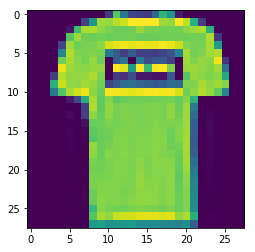

In [72]:
plt.imshow(x_train[1][:,:,0]);

In [69]:
activations = get_activations(model, x_train[1].reshape(1, 28,28,1),
                print_shape_only=True)

----- activations -----
(1, 28, 28, 64)
(1, 28, 28, 64)
(1, 28, 28, 64)
(1, 28, 28, 64)
(1, 28, 28, 64)
(1, 14, 14, 64)
(1, 14, 14, 64)
(1, 14, 14, 64)
(1, 14, 14, 64)
(1, 7, 7, 64)
(1, 7, 7, 64)
(1, 3136)
(1, 500)
(1, 500)
(1, 500)
(1, 10)


In [64]:
plt.rcParams["figure.figsize"] = (20, 20)

Displaying activation map 0
(1, 28, 28, 64)


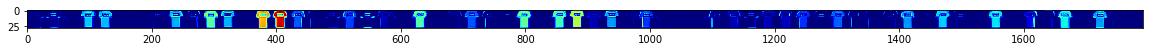

Displaying activation map 1
(1, 28, 28, 64)


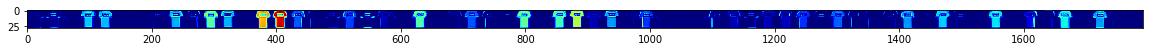

Displaying activation map 2
(1, 28, 28, 64)


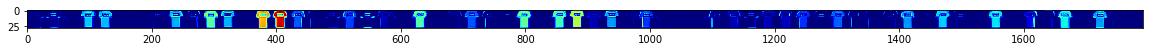

Displaying activation map 3
(1, 28, 28, 64)


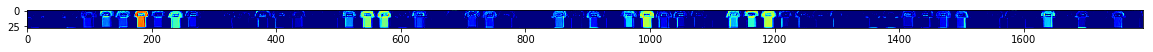

Displaying activation map 4
(1, 28, 28, 64)


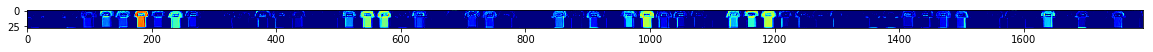

Displaying activation map 5
(1, 14, 14, 64)


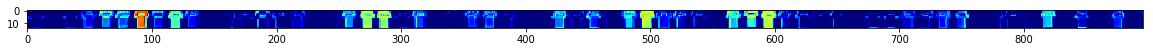

Displaying activation map 6
(1, 14, 14, 64)


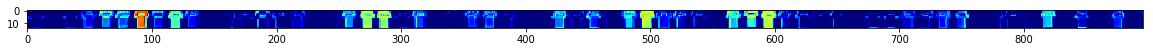

Displaying activation map 7
(1, 14, 14, 64)


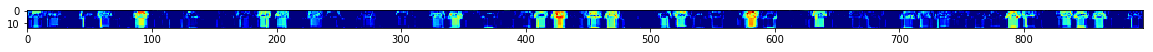

Displaying activation map 8
(1, 14, 14, 64)


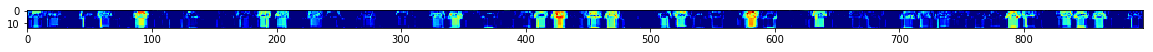

Displaying activation map 9
(1, 7, 7, 64)


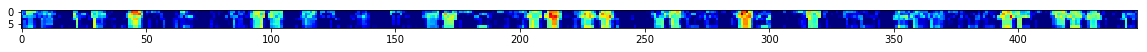

Displaying activation map 10
(1, 7, 7, 64)


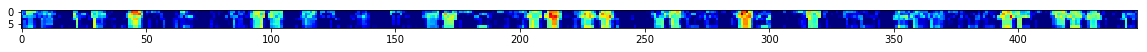

Displaying activation map 11


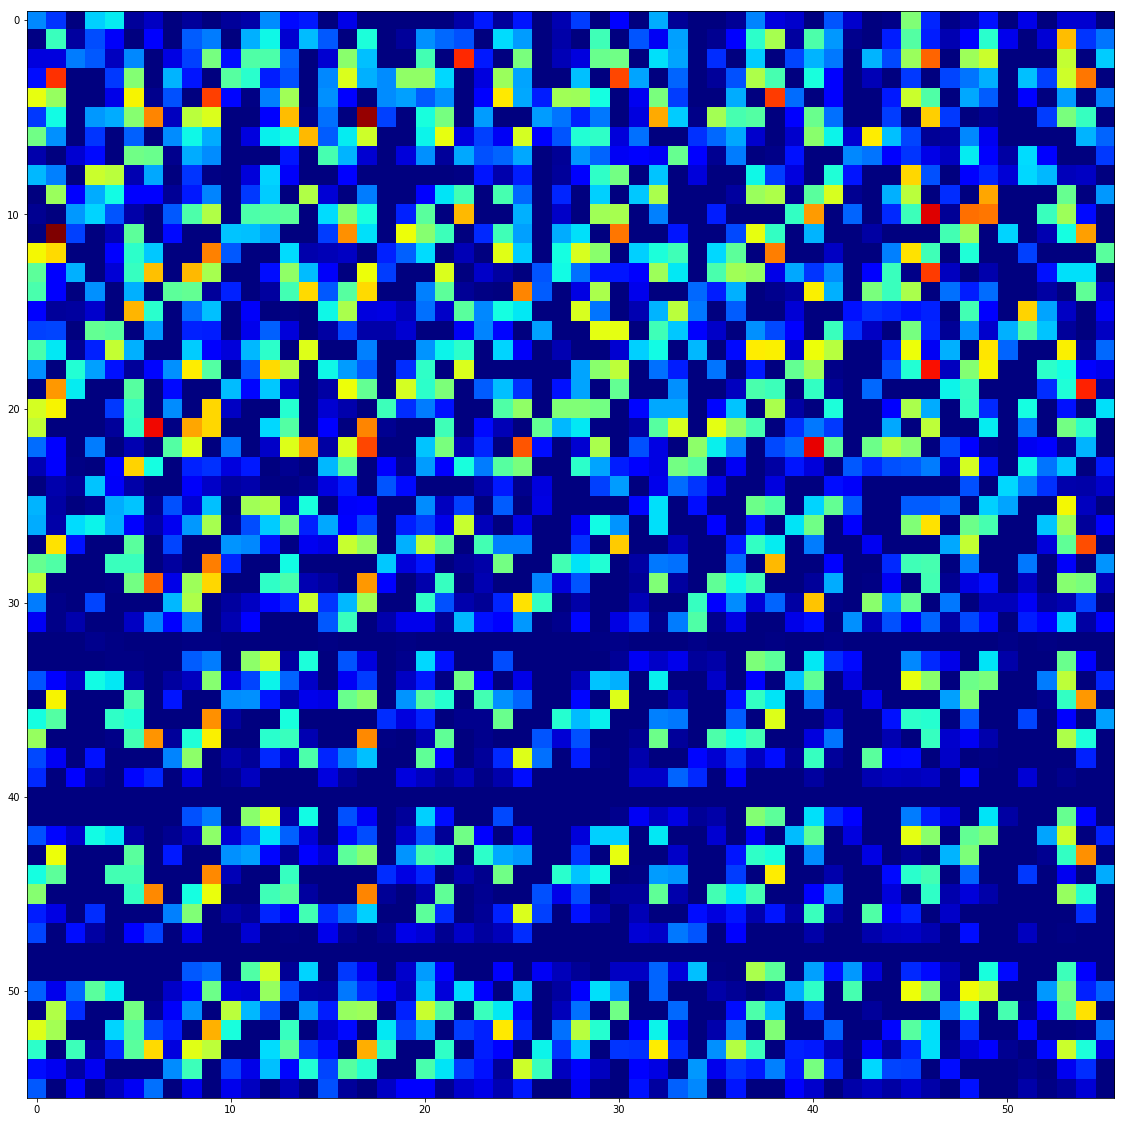

Displaying activation map 12


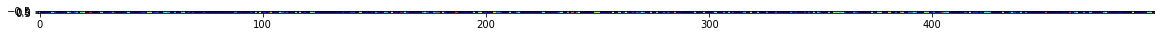

Displaying activation map 13


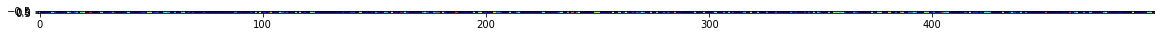

Displaying activation map 14


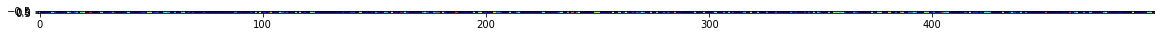

Displaying activation map 15


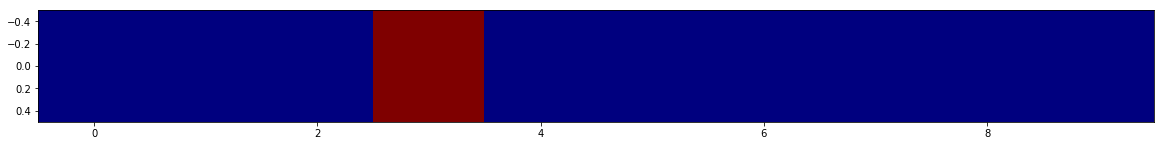

In [70]:
display_activations(activations);